In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.8, Om0=0.308) # Assuming a cosmology

In [2]:
data_Sha = pd.read_csv('./raw_data/Shajib_2021.csv').to_numpy()
data_Aug = pd.read_csv('./raw_data/Auger_2009.csv').to_numpy()

In [3]:
Slacs_galaxy_names = 'SDSS'+data_Sha[:,0]
Auger_galaxy_names = data_Aug[:,0]

In [4]:
# We cross match to retrieve stellar masses
_, indx_Slacs, indx_Aug = np.intersect1d(Slacs_galaxy_names, Auger_galaxy_names, assume_unique=True, return_indices=True,)

In [5]:
galaxy_names = Slacs_galaxy_names[indx_Slacs]
logMs = data_Aug[indx_Aug,2]
Ms = 10**logMs
Reff_arcsec = data_Sha[indx_Slacs,1]

In [6]:
# angular diameter distance in kpc; we assume unique redshift of ~0.2
d_A = cosmo.angular_diameter_distance(z=0.2).value * 1e3

# pi radian = 180 degree ==> 1deg = pi/180 ==> 1arcsec = pi/180/3600
# Reff_radian = Reff_arcsec * ( np.pi / 180 / 3600 )
# arc length = radius * angle
# Reff = d_A * Reff_radian

Reff_radian = Reff_arcsec * ( np.pi / 180 / 3600 )
Reff = d_A * Reff_radian

In [7]:
sort_Reff = np.argsort(Reff)
Reff = Reff[sort_Reff]
Ms = Ms[sort_Reff]
galaxy_names = galaxy_names[sort_Reff]

# Completing fDM fraction from Fig. 15 of Shajib et al. (2021)
fDM = np.array([
    0.09,
    0.19,
    0.25,
    0.12,
    0.36,
    0.16,
    0.16,
    0.39,
    0.17,
    0.26,
    0.22,
    0.15,
    0.32,
    0.21,
    0.17,
    0.30,
    0.23,
    0.25,
    0.30,
    0.24,
    0.47,
    0.56])

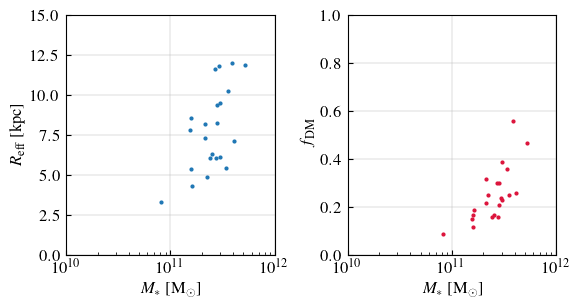

In [8]:
#################
# Plot parameters
params = {
    "font.size": 12,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (7, 3),
    "figure.subplot.left": 0.25,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.15,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.35,
    "figure.subplot.hspace": 0.35,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)
plt.figure()
ax = plt.subplot(1, 2, 1)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(Ms, Reff, 'o')

plt.axis([1e10, 1e12, 0, 15])
plt.xscale('log')
plt.ylabel(r"$R_{\mathrm{eff}}$ [kpc]")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)

######
ax = plt.subplot(1, 2, 2)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(Ms, fDM, 'o', color='crimson')

plt.axis([1e10, 1e12, 0, 1])
plt.xscale('log')
plt.ylabel(r"$f_{\mathrm{DM}}$")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.show()

In [9]:
# Writing the data into a CSV file
with open('dataset/Shajib21.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Writing the name line and the unit line
    writer.writerow([ "Name","Mstellar[Msun]","Reff[kpc]","fDM(Reff)"])

    # Looping through each element of the data
    for i in range(len(Ms)):
        Name = galaxy_names[i]
        Mass = Ms[i]
        fDMeff = fDM[i]
        Ri = Reff[i]
        # Writing the data into the CSV file
        writer.writerow([ Name, Mass, Ri, fDMeff])

In [10]:
# Reading the CSV file into a DataFrame
slacs = pd.read_csv('dataset/Shajib21.csv')
slacs

,Name,Mstellar[Msun],Reff[kpc],fDM(Reff)
0,SDSSJ0959+0410,8.128305e+10,3.368681,0.09
1,SDSSJ0252+0039,1.621810e+11,4.321439,0.19
2,SDSSJ0330-0020,2.238721e+11,4.933927,0.25
3,SDSSJ1204+0358,1.584893e+11,5.410306,0.12
4,SDSSJ1250+0523,3.388442e+11,5.444333,0.36
5,SDSSJ1636+4707,2.398833e+11,6.090847,0.16
6,SDSSJ0728+3835,2.754229e+11,6.090847,0.16
7,SDSSJ1112+0826,3.019952e+11,6.124874,0.39
8,SDSSJ2300+0022,2.511886e+11,6.329037,0.17
9,SDSSJ1630+4520,4.073803e+11,7.179714,0.26
